<h1>Neural Network Rectified Linear Unit (ReLU) vs Sigmoid</h1>


<h3>Objective<h3>    
<h5> 1. Define Several Neural Network, Criterion function, Optimizer.</h5>
<h5> 2. Test Sigmoid and Relu. </h5>
<h5> 3. Analyze Results. </h5>  

In [2]:
# Import the libraries

# Using the following line code to install the torchvision library
# !conda install -y torchvision

# PyTorch Library
import torch 
# PyTorch Neural Network
import torch.nn as nn
# Allows us to transform tensors
import torchvision.transforms as transforms
# Allows us to download datasets
import torchvision.datasets as dsets
# Allows us to use activation functions
import torch.nn.functional as F
# Used to graph data and loss curves
import matplotlib.pylab as plt
# Allows us to use arrays to manipulate and store data
import numpy as np
# Setting the seed will allow us to control randomness and give us reproducibility
torch.manual_seed(2)

## Neural Network Module and Training Function 


In [22]:
# Create the model class using Sigmoid as the activation function

class NetSigmoid(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        # D_in is the input size of the first layer (size of input layer)
        # H1 is the output size of the first layer and input size of the second layer (size of first hidden layer)
        # H2 is the outpout size of the second layer and the input size of the third layer (size of second hidden layer)
        # D_out is the output size of the third layer (size of output layer)
        super(NetSigmoid, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self,x):
        # Puts x through the first layers then the sigmoid function
        x = torch.sigmoid(self.linear1(x)) 
        # Puts results of previous line through second layer then sigmoid function
        x = torch.sigmoid(self.linear2(x))
        # Puts result of previous line through third layer
        x = self.linear3(x)
        return x

In [23]:
# Create the model class using Relu as the activation function

class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        # D_in is the input size of the first layer (size of input layer)
        # H1 is the output size of the first layer and input size of the second layer (size of first hidden layer)
        # H2 is the outpout size of the second layer and the input size of the third layer (size of second hidden layer)
        # D_out is the output size of the third layer (size of output layer)
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        # Puts x through the first layers then the relu function
        x = torch.relu(self.linear1(x))  
        # Puts results of previous line through second layer then relu function
        x = torch.relu(self.linear2(x))
        # Puts result of previous line through third layer
        x = self.linear3(x)
        return x

In [24]:
# Model Training Function

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    # Number of times we train on the entire training dataset
    for epoch in range(epochs):
        # For each batch in the train loader
        for i, (x, y) in enumerate(train_loader):
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction on the image tensor by flattening it to a 1 by 28*28 tensor
            z = model(x.view(-1, 28 * 28))
            # Calculate the loss between the prediction and actual class
            loss = criterion(z, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()
            # Saves the loss
            useful_stuff['training_loss'].append(loss.data.item())
        
        # Counter to keep track of correct predictions
        correct = 0
        # For each batch in the validation dataset
        for x, y in validation_loader:
            # Make a prediction
            z = model(x.view(-1, 28 * 28))
            # Get the class that has the maximum value
            _, label = torch.max(z, 1)
            # Check if our prediction matches the actual class
            correct += (label == y).sum().item()
    
        # Saves the percent accuracy
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

## Create the data

In [25]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

In [26]:
# Create the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [27]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

In [28]:
# Create the training data loader and validation data loader object

# Batch size is 2000 and shuffle=True means the data will be shuffled at every epoch
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
# Batch size is 5000 and the data will not be shuffled at every epoch
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

## Define Neural Network, Criterion function, Optimizer and Train the Model 


In [29]:
# Set the parameters to create the model

input_dim = 28 * 28 # Diemension of an image
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10 # Number of classes

In [30]:
# set the number of iterations

cust_epochs = 10

In [32]:
# Train the model with sigmoid function

learning_rate = 0.01
# Create an instance of the Net model
modelSigmoid = NetSigmoid(input_dim, hidden_dim1, hidden_dim2, output_dim)
# Create an optimizer that updates model parameters using the learning rate and gradient
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Train the model
training_results = train(modelSigmoid, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

In [33]:
# Train the model with relu function

learning_rate = 0.01
# Create an instance of the NetRelu model
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
# Create an optimizer that updates model parameters using the learning rate and gradient
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
# Train the model
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

## Analyze the results

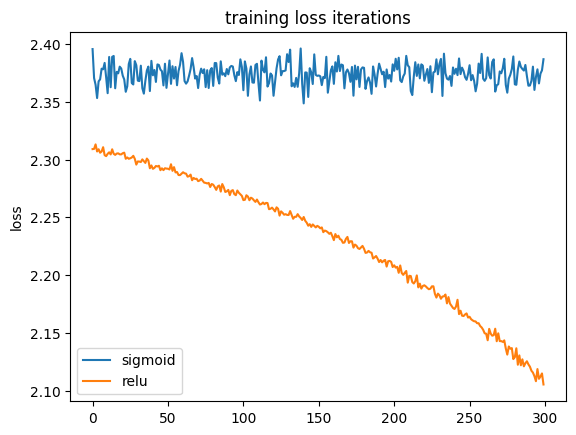

In [34]:
# Compare the training loss

plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

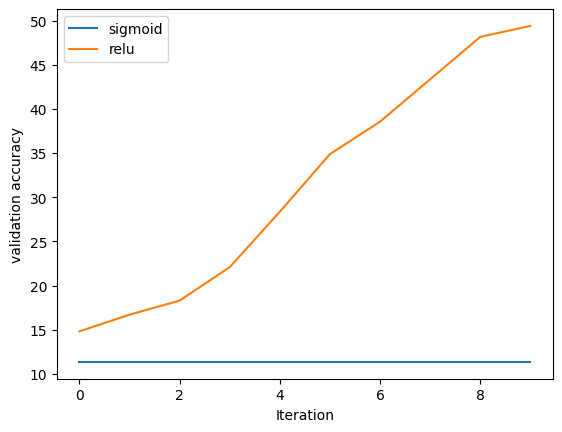

In [35]:
# Compare the validation loss

plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()